1. Cities in Sweden.

In [30]:
#a) Use your DataFrame to print out all the cities
import pandas as pd

df = pd.DataFrame({'Kommun': ['Malmö', 'Stockholm', 'Uppsala', 'Göteborg'],
      'Population': [347949, 975551, 233839, 583056]})
print(df['Kommun'])

0        Malmö
1    Stockholm
2      Uppsala
3     Göteborg
Name: Kommun, dtype: object


In [31]:
#b) Select only the row which contains Göteborg


In [32]:
#c) Sort the cities by population from largest to smallest
df.sort_values(by=['Population'], ascending=False).reset_index(drop=True)

,Kommun,Population
0,Stockholm,975551
1,Göteborg,583056
2,Malmö,347949
3,Uppsala,233839


In [33]:
# d) Filter out the three largest cities
df.sort_values(by=['Population'], ascending=False).reset_index(drop=True)[0:3]

,Kommun,Population
0,Stockholm,975551
1,Göteborg,583056
2,Malmö,347949


In [34]:
# e) A new column in sorted DataFrame named: Population(%)


2. Cities in Sweden - real dataset

In [35]:
df = pd.read_excel('komtopp50_2020.xlsx')
df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,NaN,NaN,NaN,NaN,NaN,NaN
1,"Sveriges 50 största kommuner efter folkmängd,",NaN,NaN,NaN,NaN,NaN
2,31 december 2020 jämfört med 31 december 2019,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,Rang,NaN,Kommun,Folkmängd 31 december,NaN,Förändring


In [36]:
# b) Clean your data

df.columns = ['Rang 2020', 'Rang 2019', 'Kommun', 'Folkmängd 2020', 'Folkmängd 2019', 'Förändring']
uppdated_df = df.iloc[6:].sort_values(by=['Kommun'], ascending=True).reset_index(drop=True)
uppdated_df.head()


,Rang 2020,Rang 2019,Kommun,Folkmängd 2020,Folkmängd 2019,Förändring
0,47,46.0,Borlänge,52394,52590.0,-196
1,13,13.0,Borås,113714,113179.0,535
2,22,21.0,Botkyrka,94847,94606.0,241
3,15,15.0,Eskilstuna,106975,106859.0,116
4,40,40.0,Falun,59528,59406.0,122


In [37]:
# c) Sort the cities by population from largest to smallest
large_cities = uppdated_df.sort_values(by=['Folkmängd 2020'], ascending=False).reset_index(drop=True)
large_cities.head()

,Rang 2020,Rang 2019,Kommun,Folkmängd 2020,Folkmängd 2019,Förändring
0,1,1.0,Stockholm,975551,974073.0,1478
1,2,2.0,Göteborg,583056,579281.0,3775
2,3,3.0,Malmö,347949,344166.0,3783
3,4,4.0,Uppsala,233839,230767.0,3072
4,5,5.0,Linköping,164616,163051.0,1565


In [38]:
# c) Filter out the five smallest cities
small_cities = uppdated_df.sort_values(by=['Folkmängd 2020'], ascending=True).reset_index(drop=True)
small_cities.head()

,Rang 2020,Rang 2019,Kommun,Folkmängd 2020,Folkmängd 2019,Förändring
0,50,50.0,Tyresö,48678,48333.0,345
1,49,49.0,Sigtuna,49537,48964.0,573
2,48,48.0,Hässleholm,52010,52145.0,-135
3,47,46.0,Borlänge,52394,52590.0,-196
4,46,47.0,Sundbyberg,52801,52414.0,387


In [39]:
# e) Use the DataFrame to calculate Sweden's population in 2019 and 2020
print(f'Populationen i Sverige 2020: {uppdated_df['Folkmängd 2020'].sum()}')
print(f'Populationen i Sverige 2019: {uppdated_df['Folkmängd 2019'].sum()}')

Populationen i Sverige 2020: 6227447
Populationen i Sverige 2019: 6187016.0


/var/folders/d7/2f52l94560b4zb0zppw4knhm0000gn/T/ipykernel_8612/2257775286.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = data, x=x_column[i], y='Folkmängd 2020', ax = axes[i], palette='Set2')
/var/folders/d7/2f52l94560b4zb0zppw4knhm0000gn/T/ipykernel_8612/2257775286.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90)
/var/folders/d7/2f52l94560b4zb0zppw4knhm0000gn/T/ipykernel_8612/2257775286.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = data, x=x_column[i], y='Folkmängd 2020', ax = axes[i], palette='Set2')
/var/folde

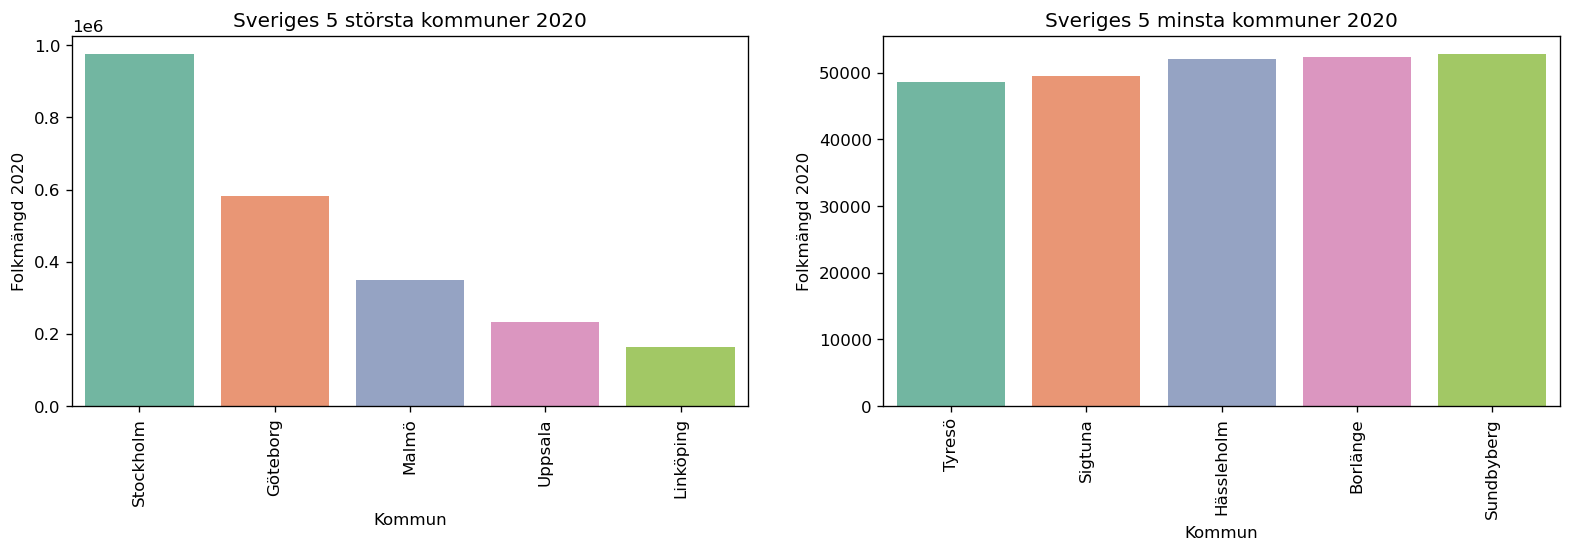

In [46]:
# f) Plot a bar chart for the five largest cities and the five smallest cities
import matplotlib.pyplot as plt
import seaborn as sns


fig, axes = plt.subplots(1,2, dpi=120, figsize=(16,4))
titles = ['Sveriges 5 största kommuner 2020', 'Sveriges 5 minsta kommuner 2020']
data_frames = [large_cities.iloc[:5], small_cities.iloc[:5]]
x_column = ['Kommun', 'Kommun']

for i, (data, title) in enumerate(zip(data_frames, titles)):
    sns.barplot(data = data, x=x_column[i], y='Folkmängd 2020', ax = axes[i], palette='Set2')
    axes[i].set(title=title)
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90)
plt.savefig("../Exercises/Cities.png", facecolor='white', bbox_inches='tight')